## Zadanie 2

##### Rekurenycjne odwracanie macierzy

In [121]:
import numpy as np

def multi_dot(dot_m, arrays): 
    '''
    function used to make multiple dots in one go
    '''
    result, op = dot_m(arrays[0], arrays[1])
    for i in range(2, len(arrays)):
        result, op_new = dot_m(result, arrays[i])
        op+=op_new
    return result, op


def recursive_inversion(matrix, dot_method):   
    '''
    function returns inverted matrix and operations it took to invert
    '''
    cnt = 0
    if matrix.shape[0] != matrix.shape[1]: raise Exception('Matrix is not a square')
    
    if matrix.shape == (1, 1):
        if matrix[0, 0] == 0: raise Exception('Matrix is invertible')
        cnt += 1
        return np.array([[1/matrix[0, 0]]]), cnt
    
    if matrix.shape == (2, 2):
        det = matrix[0, 0]*matrix[1, 1] - matrix[0, 1]*matrix[1, 0]
        if det == 0: raise Exception('Matrix is invertible')
        cnt += 6
        return np.array([[matrix[1, 1]/det, -matrix[0, 1]/det], [-matrix[1, 0]/det, matrix[0, 0]/det]]), cnt
    
    else:
        n = matrix.shape[0]
        m = n//2
        A = matrix[:m, :m]
        B = matrix[:m, m:]
        C = matrix[m:, :m]
        D = matrix[m:, m:]
        
        A_inv, cnt1 = recursive_inversion(A, dot_method)
        md_val_1, md_cnt_1 = multi_dot(dot_method, [C, A_inv, B])
        Common, cnt2 = recursive_inversion(D - md_val_1, dot_method)

        md_val_2, md_cnt_2 =multi_dot(dot_method, [A_inv, B, Common, C, A_inv])
        P = A_inv+md_val_2
        md_val_3, md_cnt_3 =multi_dot(dot_method, [A_inv, B, Common])
        Q = -md_val_3
        md_val_4, md_cnt_4 = multi_dot(dot_method, [Common, C, A_inv])
        R = -md_val_4

        S = Common  

        Top = np.row_stack([P, R])
        Bottom = np.row_stack([Q,S])
        cnt += cnt1 + cnt2 + md_cnt_1 + md_cnt_2 + md_cnt_3 + md_cnt_4

        return np.column_stack([Top, Bottom]), cnt
    



In [122]:
def assert_same(A, B, sigma = 1e-5):
    for i,row in enumerate(A):
        for j, el in enumerate(row):
            assert abs(el-B[i][j]) < sigma

In [123]:
import time
from matplotlib import pyplot as plt
from multi_algorithms import cauchy_binet_recursive, strassen_matrix_multiply


def test_algorithm(max_k):
    x = []
    y_t = [[] for _ in range(2)]
    y_op = [[] for _ in range(2)]
    for k in range(2,max_k+1):
        n = 2**k
        A = np.random.rand(n,n)

        start = time.time()
        A_inv, ops = recursive_inversion(A, cauchy_binet_recursive)
        end = time.time()

        assert_same(A_inv, np.linalg.inv(A))
        y_t[0].append(end-start)
        y_op[0].append(ops)

        start = time.time()
        A_inv, ops = recursive_inversion(A, strassen_matrix_multiply)
        end = time.time()

        assert_same(A_inv, np.linalg.inv(A))
        y_t[1].append(end-start)
        y_op[1].append(ops)

        x.append(k)


    return x, y_t, y_op


In [124]:
x, y_t, y_op = test_algorithm(8)


['0.0s', '0.0s', '0.01s', '0.09s', '0.67s', '5.44s', '43.34s']
['0.0s', '0.0s', '0.03s', '0.18s', '1.26s', '8.84s', '62.44s']


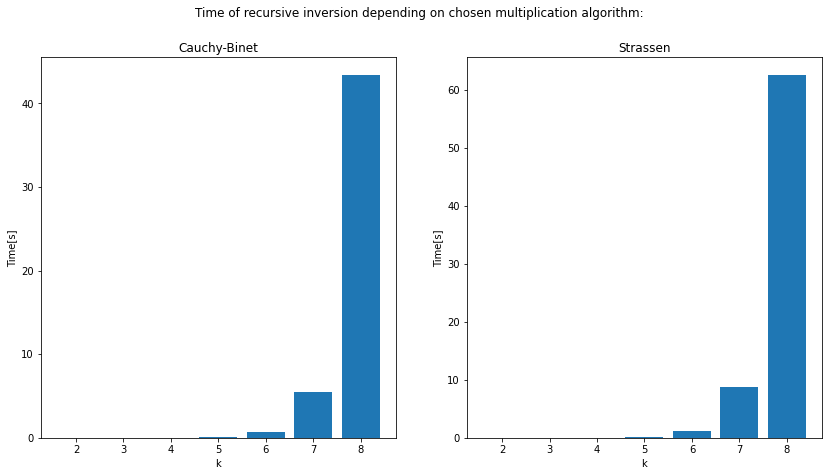

In [142]:
# plot two bars on one plot
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.suptitle('Time of recursive inversion depending on chosen multiplication algorithm:')
plt.bar(x, y_t[0])
plt.title('Cauchy-Binet')
plt.xlabel('k')
plt.ylabel('Time[s]')
plt.subplot(1,2,2)
plt.bar(x, y_t[1])
plt.title('Strassen')
plt.xlabel('k')
plt.ylabel('Time[s]')

print([str(round(el,2)) + 's' for el in y_t[0]])
print([str(round(el,2)) + 's' for el in y_t[1]])


[132, 1384, 12368, 104096, 853312, 6908544, 55596288]
[262, 2994, 26158, 205026, 1525102, 11039874, 78744718]


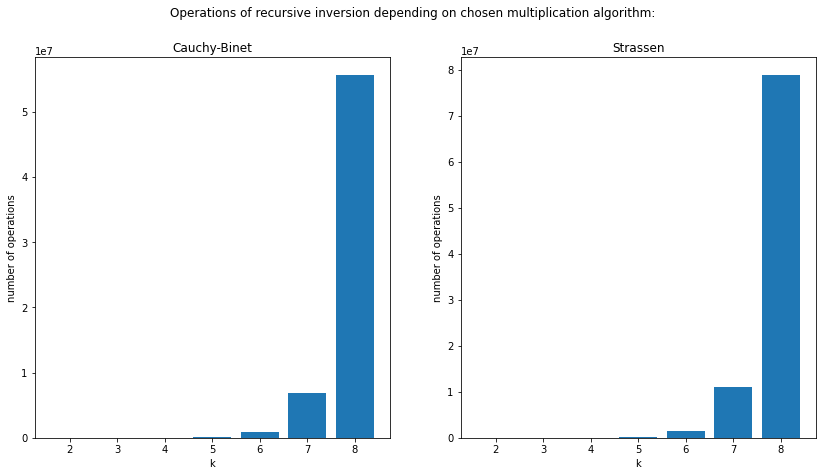

In [144]:
# plot two bars on one plot
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.suptitle('Operations of recursive inversion depending on chosen multiplication algorithm:')
plt.bar(x, y_op[0])
plt.title('Cauchy-Binet')
plt.xlabel('k')
plt.ylabel('number of operations')
plt.subplot(1,2,2)
plt.bar(x, y_op[1])
plt.title('Strassen')
plt.xlabel('k')
plt.ylabel('number of operations')

print(y_op[0])
print(y_op[1])